# Mushrooms classification

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

### Necessary libraries

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier


### Loading dataset

Dataset consists of 8124 records, 22 independent variables and target variable <i> class </i> that has 2 unique vauses: 

- p - poisonous
- e - edible
    
There are no missing values and all variables are categorical.

In [140]:
df = pd.read_csv("mushrooms.csv")

In [141]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [143]:
#count of missing values

df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot:xlabel='class', ylabel='Count'>

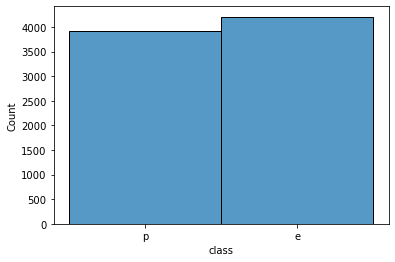

In [144]:
sns.histplot(x=df["class"])

### One-hot encoding

In [157]:
df_cat = pd.get_dummies(df, drop_first=True)

X = df_cat.drop("class_p", axis=1)
y = df_cat["class_p"]

### Train and test split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

### Dummy Classifier

In [129]:
#starting with dummy classifier to have some reference for future predictions

dummy = DummyClassifier(strategy = 'prior')
dummy.fit(X_train, y_train)
pred_y = dummy.predict(X_test)
print('Accuracy score: %.2f' % accuracy_score(y_test, pred_y))
print('Mean absolute error: %.2f' % mean_squared_error(y_test,pred_y))

Accuracy score: 0.52
Mean absolute error: 0.48


### Features selection

In [146]:
#checking the feature importance
tree = ExtraTreesClassifier()
tree.fit(X,y)
tree.feature_importances_

array([1.35204274e-04, 1.16510550e-03, 7.42157524e-05, 6.70397420e-04,
       7.19399636e-04, 2.78633173e-04, 5.72152438e-03, 1.95957566e-03,
       6.25772640e-04, 2.06134831e-03, 1.19443078e-03, 1.52063726e-03,
       2.41927353e-03, 2.96231182e-04, 3.80669761e-04, 3.17128831e-03,
       3.47423559e-03, 4.60291419e-02, 1.49149110e-02, 7.60199604e-02,
       9.51066632e-03, 5.99508848e-04, 1.66309397e-01, 1.99463012e-02,
       6.31169788e-03, 5.46366179e-03, 3.93779436e-03, 1.56253284e-02,
       8.66709654e-02, 5.96966065e-05, 1.49347675e-03, 1.28931046e-03,
       5.16246626e-04, 3.02479599e-03, 0.00000000e+00, 4.51757600e-04,
       2.04076173e-03, 6.40245542e-04, 4.33368179e-03, 1.87664863e-04,
       1.17774322e-02, 2.22209240e-02, 1.35139543e-02, 1.39248688e-02,
       3.02357942e-03, 4.87778486e-02, 2.69644124e-02, 2.49634784e-04,
       4.10720768e-02, 1.08487362e-02, 3.19415728e-03, 8.34911281e-04,
       1.11325595e-05, 3.87269099e-03, 6.11478970e-04, 1.34627349e-03,
      

<AxesSubplot:>

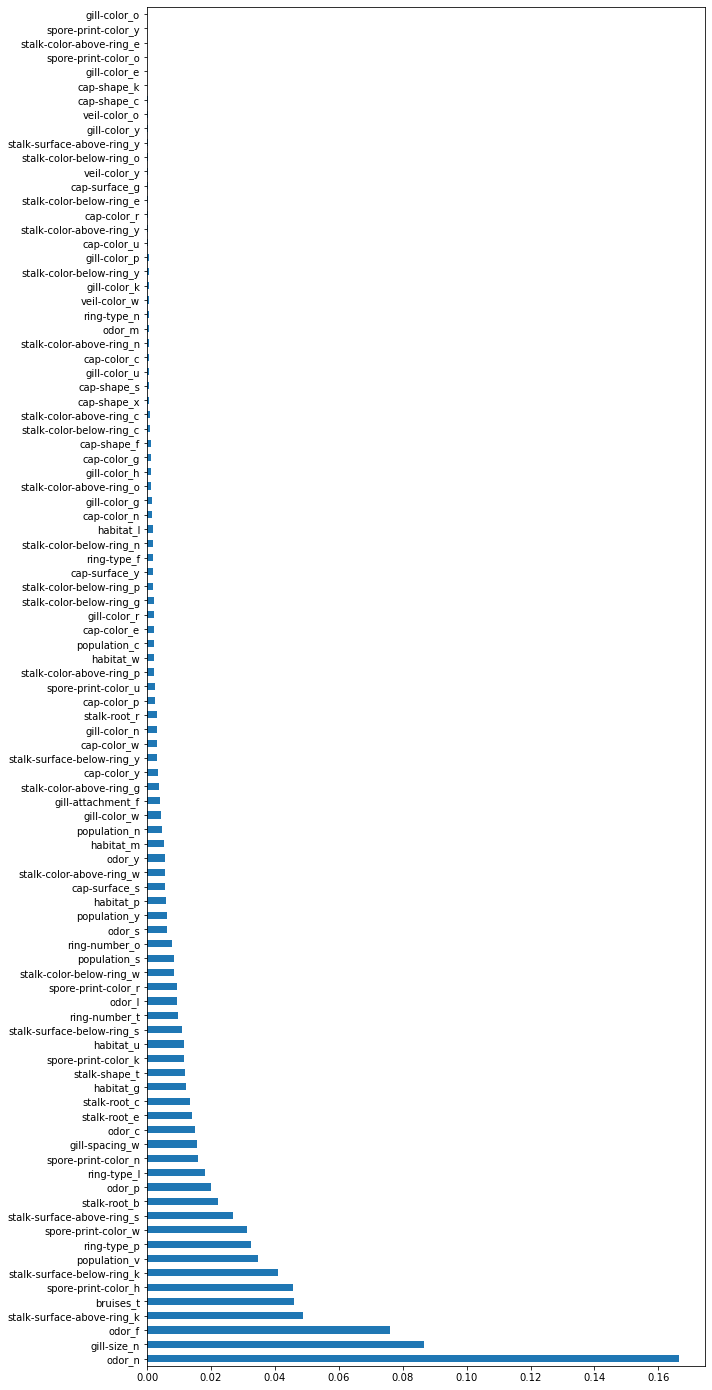

In [147]:
#ranking and plotting feature importance

plt.figure(figsize=(10, 25))
feature_rank = pd.Series(tree.feature_importances_, index = X.columns)
feature_rank.nlargest(95).plot(kind = "barh")

In [148]:
#choosing 20 most importante variables

drop_column = feature_rank.nsmallest(20).index
X.drop(drop_column, axis = 1, inplace=True )

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [156]:
# using random forest in order to predict, metrics used: accuracy, R2, mean_absolute_error

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
pred_y = forest.predict(X_test)

print('Accuracy score: %.2f' % accuracy_score(y_test, pred_y))
print('R2 score: %.2f' % forest.score(X_test,y_test))
print('Mean squared error: %.2f' % mean_squared_error(y_test, pred_y))

Accuracy score: 1.00
R2 score: 1.00
Mean squared error: 0.00
